## 案例：ROI 区域图像增强

### 案例目标

假设您需要创建一个应用程序，通过给定的 ROI 区域 X/Y/W/H 参数 **`x=20，y=20，w=480，h=600`**，仅在该 ROI 区域内实现图像增强。

我们将提供下面的图像 **`图像路径：'./data/ocean.jpg'`** 作为操作对象，并给出 ROI 区域的 X/Y/W/H 参数，您的任务是对在该区域内对图像执行 CLAHE 图像增强。

<img src="./img/29.jfif" width="70%">

### 案例详细操作说明

1. 导入必要的库，并读取 BGR 图像 **`图像路径：'./data/ocean.jpg'`**。
2. 根据 ROI 参数 **`x=20，y=20，w=480，h=600`** 创建一个二值掩码蒙版图像，并保存。
3. 将 BGR 图像转换为 HSV 色彩空间。
4. 绘制位于图像 ROI 区域的 V 平面直方图。
5. 对 HSV 图像 ROI 区域的 V 平面执行 CLAHE。
6. 再次绘制位于图像 ROI 区域的 V 平面直方图。
7. 将图像转换回 RGB 空间并可视化。


- 提示1：第2步，您可以先创建一幅全零填充（全黑）并且与原图像尺寸相同的蒙版图像
  - **`mymask= np.zeros(im.shape[:2],  dtype = "uint8")`** 
  
- 提示2：第2步，在蒙版的 ROI 中，将所有像素设为白色（255）,形成黑白对比明显的 ROI 区域
  - **`mymask[int(y):int(y+h) , int(x):int(x+w)]= 255`**
  
- 提示3：第5步，你可以先创建一个变量 
  - **`v= imgHSV[:,:,2]`** 
  - 提取图像的 V 平面；
  
- 提示4：第5步，你可以创建一个 **`阈值为7，区快尺寸为 8x8 的 CLAHE 对象`**
  
- 提示5：第5步，在完成 CLAHE 对象创建后，通过:
  - **`v[int(y):int(y+h) , int(x):int(x+w)]= clahe.apply(v[int(y):int(y+h) , int(x):int(x+w)]) `**
  - 将 CLAHE 应用到 V 平面的 ROI 区域。

通过完成此案例，您将了解如何操作图像中特定 ROI 的直方图。这将使您看到图像的直方图均衡化区域与其他区域之间的强烈对比。

BGR 的图像最后效果如下所示:

<img src="./img/30.jfif" width="80%">

### 案例小结

通过完成此案例，您现在获得了在均衡化特定彩色图像 ROI 的直方图均衡化，以突出显示所选部分的细节方面的实际经验。

至此，我们对灰度图像和彩色图像中的直方图均衡化和 CLAHE 方法进行了详细的介绍。对于彩色图像，我们在 RGB、LAB 和 HSV 颜色空间中实现了这些方法。我们的结论是，CLAHE 在灰度和彩色图像上都优于简单的直方图均衡化。我们还看到，对于彩色图像，BGR 颜色空间的 R、G 和 B 平面的直方图均衡化引入了伪影，因为所有这些平面的颜色信息都是独立改变的。

因此，对于彩色图像进行直方图均衡化，最好的处理方式是在 HSV 或 LAB 颜色空间中，因为颜色信息从光线强度信息中分离出来，并且颜色平面没有改变。

### 案例答案

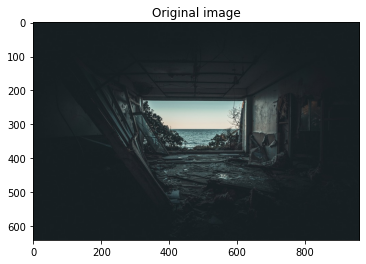

In [1]:
# 导入必要的库
import cv2                       # 导入OpenCV
import numpy as np               # 导入numPy    
import matplotlib.pyplot as plt  # 导入matplotlib

# 魔法指令，使图像直接在Notebook中显示
%matplotlib inline

# 设置输入输出路径
import os
base_path = os.environ.get("BASE_PATH",'../data/')
data_path = os.path.join(base_path + "lab3/")
result_path = "result/"
os.makedirs(result_path, exist_ok=True)

# 读取 BGR 图像
im = cv2.imread('./data/ocean.jpg') # 读取图像文件
origrgb = cv2.cvtColor(im,cv2.COLOR_BGR2RGB); # 将图像转换为RGB
imgplot = plt.imshow(origrgb)                 # 指定显示转换后的图像
plt.title('Original image')                   # 指定图像标题
plt.show()                                    # 显示图像

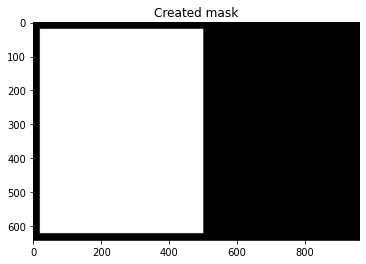

True

In [2]:
x = 20 # 定义起点X坐标
y = 20 # 定义起点Y坐标
w = 480  # 定义从起点开始，ROI 区域的宽度
h = 600  # 定义从起点开始，ROI 区域的高度

# 创建一张全零填充，与图像im同样尺寸的图片
mymask= np.zeros(im.shape[:2],  dtype = "uint8")  

# 在蒙版的ROI中，将所有像素设为白色（255）
mymask[int(y):int(y+h) , int(x):int(x+w)]= 255   

# 将图片转换为RGB
mask_rgb = cv2.cvtColor(mymask,cv2.COLOR_BGR2RGB);  
# 指定显示转换后的图像
imgplot = plt.imshow(mask_rgb)                      
# 指定图像标题
plt.title('Created mask')                           
# 显示图片
plt.show()                                          

# 保存蒙版图像
cv2.imwrite(result_path+'mask_image.png' , mymask)              

In [3]:
# 将图像转换为HSV模式
imgHSV = cv2.cvtColor(im,cv2.COLOR_BGR2HSV);           

Text(0.5, 1.0, 'V plane')

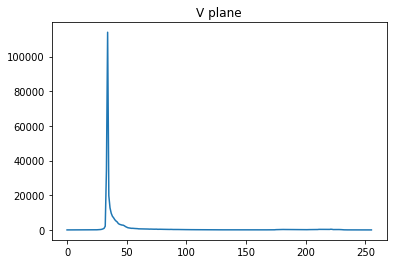

In [4]:
# 根据蒙版图像mymask定义的ROI区域，对imHSV图像绘制明度通道(V平面)的直方图
hist = cv2.calcHist([imgHSV],[2],mymask,[256],[0,255]) 

# 输出直方图
plt.plot(hist)                                         
# 定义直方图标题为“V plane”
plt.title('V plane')                                   

In [5]:
#提取imgHSV图像的V平面
v= imgHSV[:,:,2] 

# 创建一个阈值为7，区快尺寸为8x8的CLAHE对象
clahe = cv2.createCLAHE(clipLimit=7.0, tileGridSize=(8,8))   

# 仅将CLAHE对象应用至ROI区域的V平面内
v[int(y):int(y+h) , int(x):int(x+w)]= clahe.apply(v[int(y):int(y+h) , 
                                                    int(x):int(x+w)]) 

Text(0.5, 1.0, 'enhanced V plane')

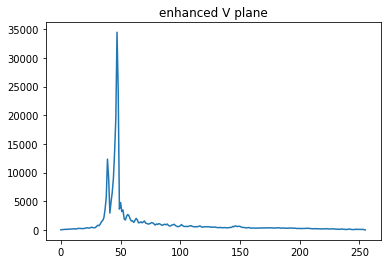

In [6]:
# 根据蒙版图像mymask定义的ROI区域，
# 对已经完成ROI区域CLAHE操作的图像enhanced
# 绘制明度通道(V平面)的直方图
hist = cv2.calcHist([imgHSV],[2],mymask,[256],[0,255]) 

# 输出直方图
plt.plot(hist)                                         
# 定义直方图标题为“enhanced V plane”
plt.title('enhanced V plane')                          

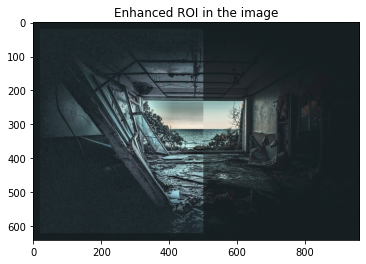

In [7]:
# 将图片转换为RGB
enhanced = cv2.cvtColor(imgHSV,cv2.COLOR_HSV2RGB);  
# 指定显示转换后的图像
imgplot = plt.imshow(enhanced)                                         
# 指定图像标题
plt.title('Enhanced ROI in the image')              
# 显示图片
plt.show()                                          